In [157]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [132]:
df=pd.read_csv('train.csv')

In [134]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [135]:
dy.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [136]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
df['SibSp'].nunique()

7

In [138]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

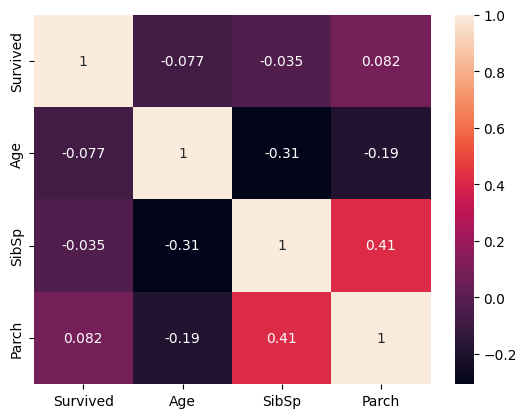

In [139]:
heatmap=sns.heatmap(df[['Survived','Age','SibSp','Parch']].corr(),annot=True)

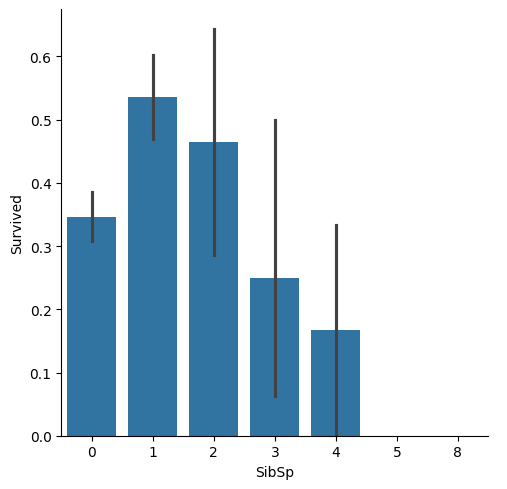

In [140]:
sns.catplot(x='SibSp',y='Survived',data=df,kind='bar')

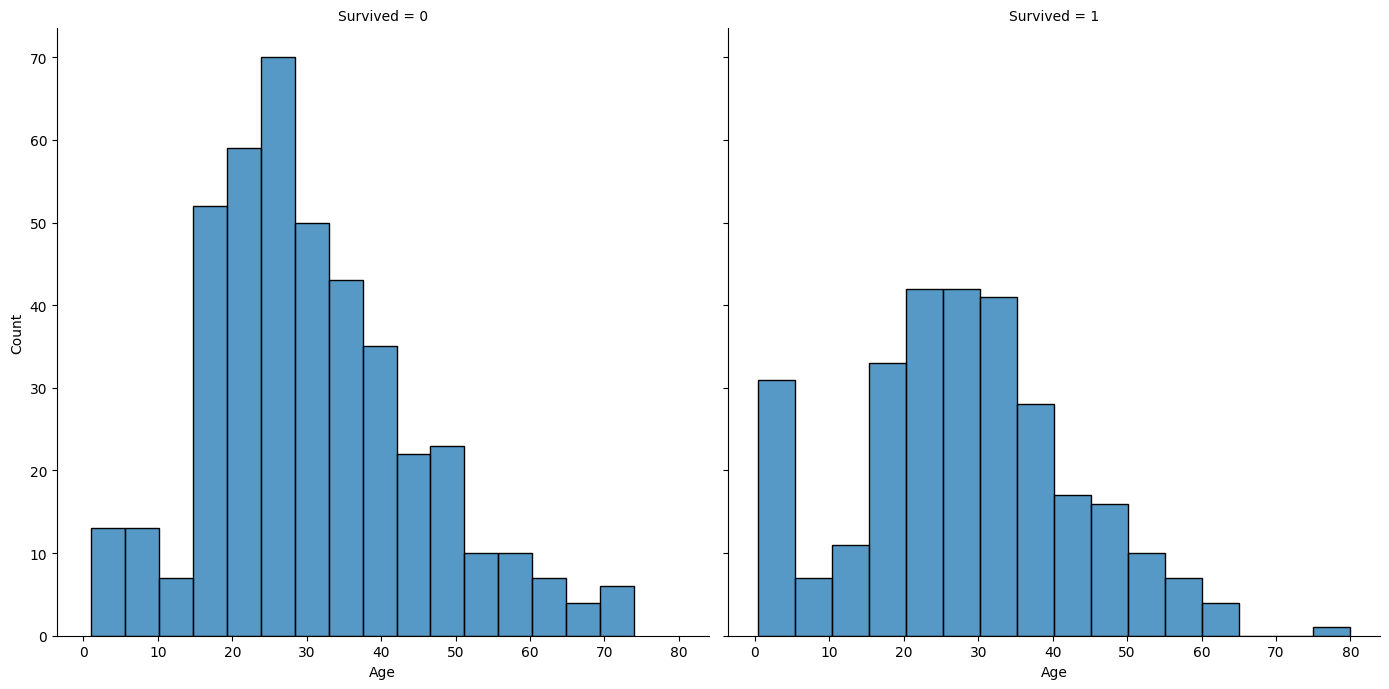

In [141]:
agevis=sns.FacetGrid(df,col='Survived',height=7)
agevis=agevis.map(sns.histplot,'Age')

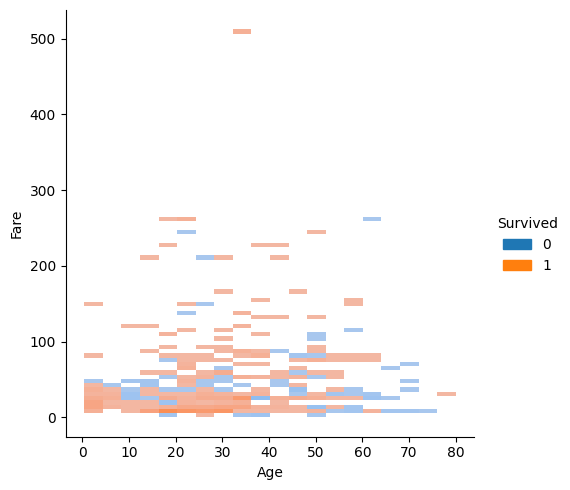

In [142]:
sns.displot(x='Age',y='Fare',hue='Survived',data=df)

In [143]:
df[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [144]:
df['Embarked'].isnull().sum()

2

In [145]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [146]:
df['Embarked']=df['Embarked'].fillna('S')

In [147]:
df['Embarked'].isnull().sum()

0

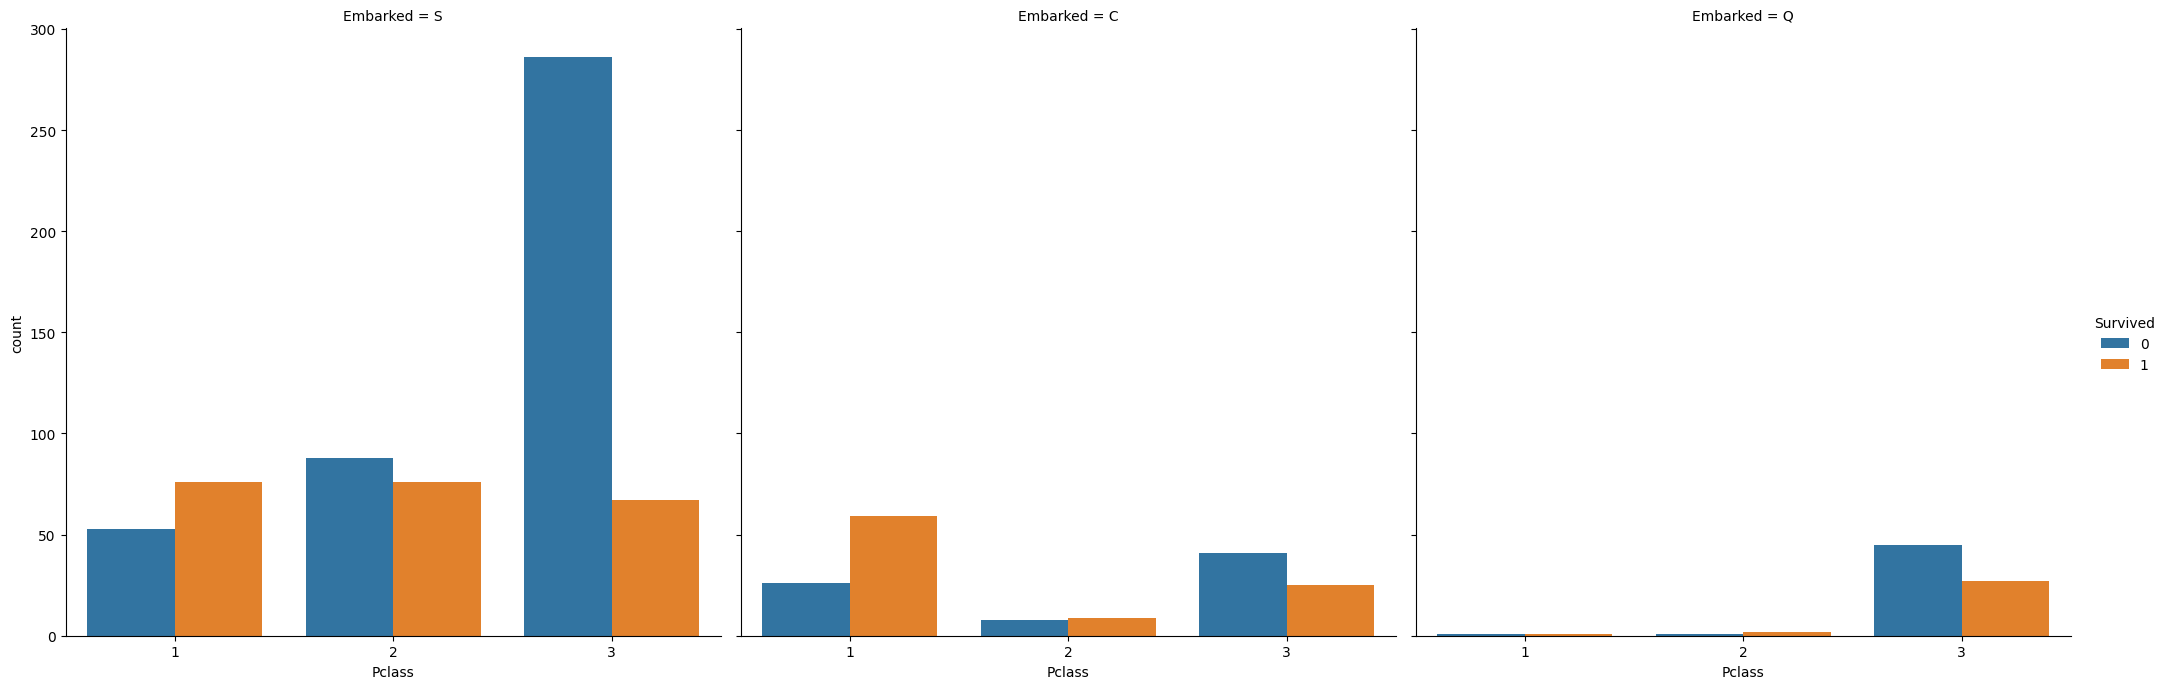

In [148]:
g = sns.catplot(x='Pclass', col='Embarked', data=df,hue="Survived", kind='count', height=7)


In [149]:
meanage=df['Age'].mean()
stdage=df['Age'].std()
ageisnull=df['Age'].isnull().sum()

In [150]:
rand_age=np.random.randint(meanage-stdage,meanage+stdage)
a=df['Age'].copy()
a[np.isnan(a)]=rand_age
df['Age']=a

In [151]:
df['Age'].isnull().sum()

0

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [153]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [154]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [155]:
gender={'male':0,'female':1}
df['Sex']=df['Sex'].map(gender)
ports={'S':0,'C':1,'Q':2}
df['Embarked']=df['Embarked'].map(ports)

In [156]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [161]:
x=df.iloc[:,1:]
y=df.iloc[:,:1]


In [164]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [165]:
from sklearn.preprocessing import StandardScaler
sk_l=StandardScaler()
xtrain=sk_l.fit_transform(xtrain)
xtest=sk_l.fit_transform(xtest)

In [167]:
logreg=LogisticRegression()
dt_classifier=DecisionTreeClassifier()
svc_classifier=SVC()
knn_classifier=KNeighborsClassifier()
rf_classifier=RandomForestClassifier(n_estimators=1000)

In [168]:
logreg.fit(xtrain,ytrain)
dt_classifier.fit(xtrain,ytrain)
svc_classifier.fit(xtrain,ytrain)
knn_classifier.fit(xtrain,ytrain)
rf_classifier.fit(xtrain,ytrain)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base

RandomForestClassifier(n_estimators=1000)

In [170]:
logP=logreg.predict(xtest)
dtP=dt_classifier.predict(xtest)
svcP=svc_classifier.predict(xtest)
knnP=knn_classifier.predict(xtest)
rfp=rf_classifier.predict(xtest)

In [172]:
from sklearn.metrics import accuracy_score

loga=accuracy_score(logP,ytest)
dta=accuracy_score(dtP,ytest)
svca=accuracy_score(svcP,ytest)
knna=accuracy_score(knnP,ytest)
rfa=accuracy_score(rfp,ytest)

In [174]:

print ("Logistic Regression :",round (loga*100, 2))
print ("Support Vector",round(svca*100, 2))
print ("Decision Tree",round (dta*100, 2))
print ("K-NN Classifier",round (knna*100, 2))
print ("Random Forest",round (rfa*100, 2))

Logistic Regression : 80.6
Support Vector 81.72
Decision Tree 79.85
K-NN Classifier 78.73
Random Forest 77.24
